In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("bengaluru_house_prices.csv")

In [4]:
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [7]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df = df.drop(['area_type' , 'availability' , 'society' , 'balcony'],axis = "columns")
df.head(2)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00


In [9]:
df.isnull().sum().sum()

90

In [10]:
df.dropna(inplace = True)

In [11]:
df.shape

(13246, 5)

In [12]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df["bhk"] = df["size"].apply(lambda x: int(x.split(' ')[0]))
df.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3


In [14]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
def sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
df['total_sqft'] = df['total_sqft'].apply(sqft_to_num)
df.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [19]:
df.dtypes

location       object
size           object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object

### FEATURE ENGINEERING

In [20]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615


In [21]:
len(df.location.unique())

1304

In [22]:
df5 = df.copy()

In [23]:
df5.location = df5.location.apply(lambda x : x.strip())
location_stats = df5.groupby('location') ["location"].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [24]:
len(location_stats[location_stats<=10])

1052

In [25]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [26]:
df5.location = df5.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
df5.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615


In [27]:
len(df5.location.unique())

242

### REMOVE OUTLIERS

In [28]:
df5[df5.total_sqft/df5.bhk<300].head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333


In [29]:
df5 = df5[~(df5.total_sqft/df5.bhk<300)]
df5.shape

(12502, 7)

In [30]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [31]:
def remove_outliers_pps(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st)) ]
        df_out = pd.concat([df_out , reduced_df] , ignore_index = True)
    return df_out
df6 = remove_outliers_pps(df5)
df6.shape

(10241, 7)

No handles with labels found to put in legend.


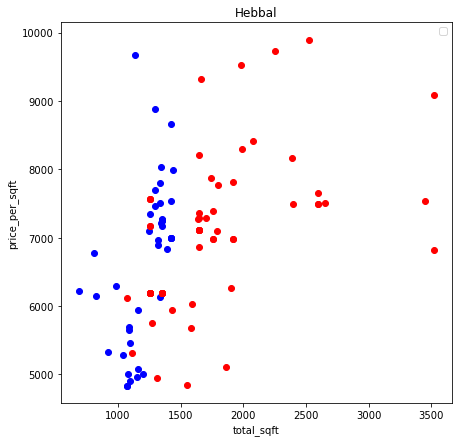

In [32]:
def plot_scatter_total_against_per_sqft(df,location):
    bhk2 = df[(df.location == location) & (df.bhk==2)]
    bhk3 = df[(df.location == location) & (df.bhk==3)]
    plt.figure(figsize=(7,7))
    plt.scatter(bhk2.total_sqft , bhk2.price_per_sqft , color = 'blue')
    plt.scatter(bhk3.total_sqft , bhk3.price_per_sqft , color = 'red')
    plt.xlabel("total_sqft")
    plt.ylabel("price_per_sqft")
    plt.title(location)
    plt.legend()
plot_scatter_total_against_per_sqft(df6 , "Hebbal")

In [33]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices , axis = 'index')          

In [34]:
df7 = remove_bhk_outliers(df6)
df7.shape

(7329, 7)

No handles with labels found to put in legend.


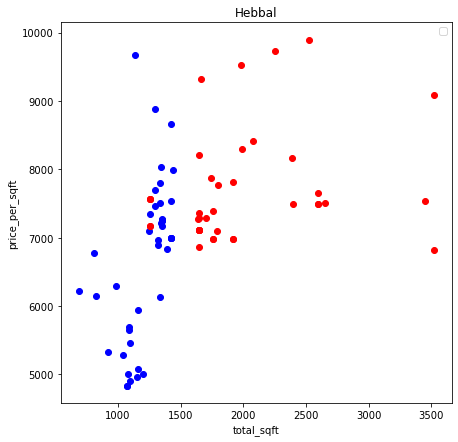

In [35]:
def plot_scatter_total_against_per_sqft(df,location):
    bhk2 = df[(df.location == location) & (df.bhk==2)]
    bhk3 = df[(df.location == location) & (df.bhk==3)]
    plt.figure(figsize=(7,7))
    plt.scatter(bhk2.total_sqft , bhk2.price_per_sqft , color = 'blue')
    plt.scatter(bhk3.total_sqft , bhk3.price_per_sqft , color = 'red')
    plt.xlabel("total_sqft")
    plt.ylabel("price_per_sqft")
    plt.title(location)
    plt.legend()
plot_scatter_total_against_per_sqft(df7 , "Hebbal")

In [36]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'count')

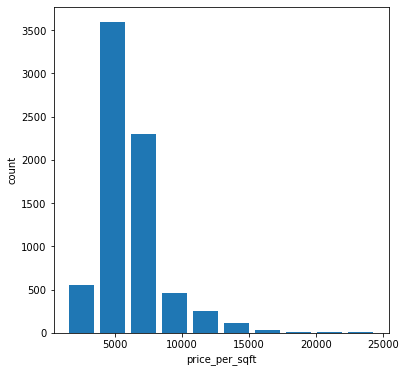

In [37]:
plt.figure(figsize=(6,6))
plt.hist(df7.price_per_sqft , rwidth=0.8)
plt.xlabel("price_per_sqft")
plt.ylabel("count")

In [38]:
df7[df7.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

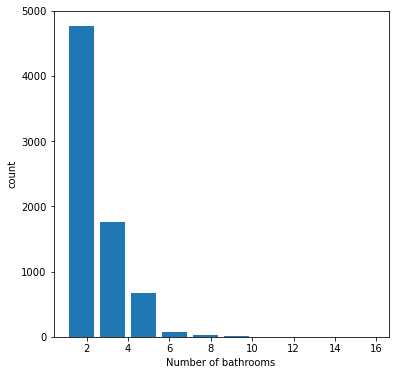

In [39]:
plt.figure(figsize=(6,6))
plt.hist(df7.bath , rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("count")

In [40]:
df7 = df7[df7.bath < df7.bhk+2]
df7.shape

(7251, 7)

In [41]:
df7 = df7.drop(['size' , 'price_per_sqft'] , axis ="columns")
df7.head(2)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3


# MODEL TRAINING

In [46]:
dummies = pd.get_dummies(df7.location)
dummies.head(2)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df8 = pd.concat([df7 , dummies.drop('other' , axis = "columns")], axis = "columns")
df8.head(2)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df8 = df8.drop('location' , axis ='columns')

In [52]:
X=df8.drop('price' , axis ="columns")
Y=df8.price

In [54]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state=10)

In [55]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train , Y_train)
lr.score(X_test , Y_test)

0.8452277697874312

In [57]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5 , test_size = 0.2 , random_state = 0)
cross_val_score(LinearRegression() , X ,Y , cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [66]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,Y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' :[True,False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random' , 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse' , 'friedman_mse'],
                'splitter' : ['best' , 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5 , test_size = 0.2 , random_state = 0)
    for algo_name , config in algos.items():
        gs = GridSearchCV(config['model'] , config['params'] , cv = cv , return_train_score=False)
        gs.fit(X , Y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_ , 
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores , columns=['model' , 'best_score' , 'best_params'])

In [67]:
find_best_model(X,Y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687478,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.728128,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [78]:
def predict_price(location , sqft , bhk , bath, X):
    loc_index = np.where(X.columns == location)[0][0]
    
    X = np.zeros(len(X.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    
    if loc_index >= 0:
        X[loc_index] = 1
        
    return lr.predict([X])[0]

In [79]:
predict_price('Indira Nagar' , 1000 ,2 ,2 , X)

181.27815484006857

In [80]:
import pickle
with open('banglore_home_prices_model.pickle' , 'wb') as f:
    pickle.dump(lr,f)

In [81]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json' , 'w') as f:
    f.write(json.dumps(columns))